<a href="https://colab.research.google.com/github/ZynTran/Fuzzy_Logic/blob/main/Vidu2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.2 MB/s eta 0:00:00


Diabetes Risk: 48.71276595744679


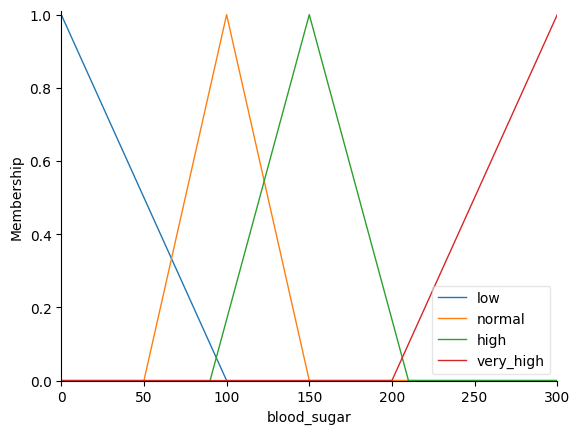

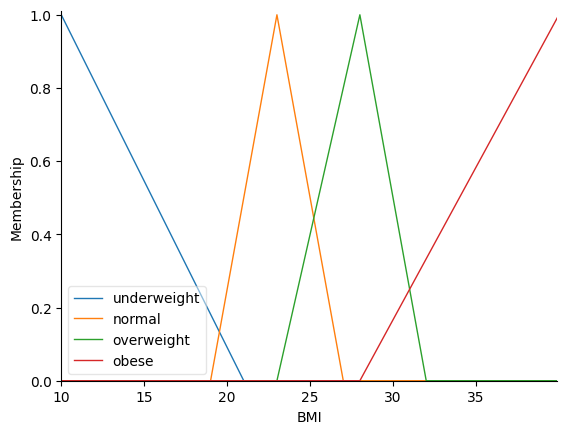

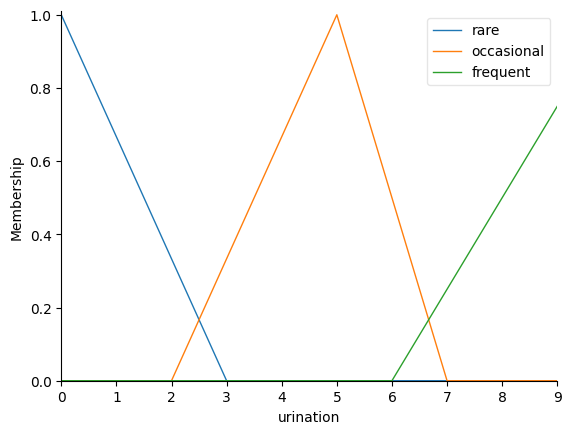

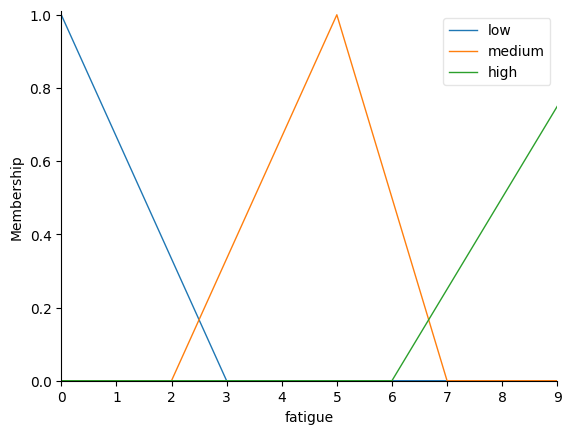

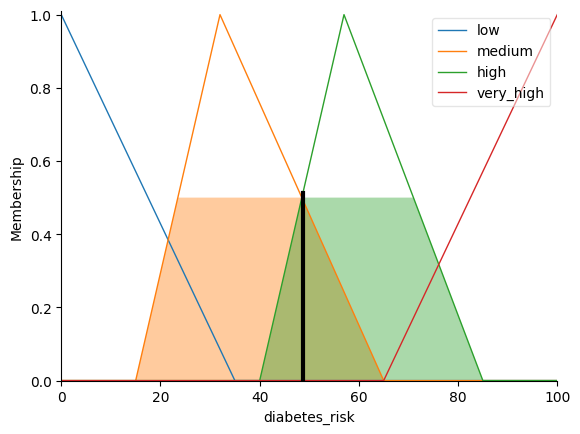

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

blood_sugar = ctrl.Antecedent(np.arange(0, 301, 1), 'blood_sugar')
BMI = ctrl.Antecedent(np.arange(10, 40, 0.1), 'BMI')
urination = ctrl.Antecedent(np.arange(0, 10, 1), 'urination')
fatigue = ctrl.Antecedent(np.arange(0, 10, 1), 'fatigue')

diabetes_risk = ctrl.Consequent(np.arange(0, 101, 1), 'diabetes_risk')

blood_sugar['low']= fuzz.trimf(blood_sugar.universe, [0, 0, 100])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [50, 100, 150])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [90, 150, 210])
blood_sugar['very_high'] = fuzz.trimf(blood_sugar.universe, [200, 300, 300])

BMI['underweight'] = fuzz.trimf(BMI.universe, [10,10,21])
BMI['normal'] = fuzz.trimf(BMI.universe, [19, 23, 27])
BMI['overweight'] = fuzz.trimf(BMI.universe, [23, 28, 32])
BMI['obese'] = fuzz.trimf(BMI.universe, [28, 40, 40])

urination['rare'] = fuzz.trimf(urination.universe, [0, 0, 3])
urination['occasional'] = fuzz.trimf(urination.universe, [2, 5, 7])
urination['frequent'] = fuzz.trimf(urination.universe, [6, 10, 10])

fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 0, 3])
fatigue['medium'] = fuzz.trimf(fatigue.universe, [2, 5, 7])
fatigue['high'] = fuzz.trimf(fatigue.universe, [6, 10, 10])

diabetes_risk['low'] = fuzz.trimf(diabetes_risk.universe, [0, 0, 35])
diabetes_risk['medium'] = fuzz.trimf(diabetes_risk.universe, [15, 32, 65])
diabetes_risk['high'] = fuzz.trimf(diabetes_risk.universe, [40, 57, 85])
diabetes_risk['very_high'] = fuzz.trimf(diabetes_risk.universe, [65, 100, 100])

blood_sugar.view()
BMI.view()
urination.view()
fatigue.view()

rule1 = ctrl.Rule(blood_sugar['very_high'] & urination['frequent'], diabetes_risk['very_high'])
rule2 = ctrl.Rule(blood_sugar['very_high'] & urination['occasional'], diabetes_risk['high'])
rule3 = ctrl.Rule(blood_sugar['high'] & urination['frequent'], diabetes_risk['high'])
rule4 = ctrl.Rule(blood_sugar['normal'] & urination['rare'], diabetes_risk['low'])
rule5 = ctrl.Rule(blood_sugar['very_high'] &  BMI['obese'], diabetes_risk['very_high'])
rule6 = ctrl.Rule(blood_sugar['very_high'] & BMI['overweight'], diabetes_risk['high'])
rule7 = ctrl.Rule(blood_sugar['high'] & BMI['overweight'], diabetes_risk['high'])
rule8 = ctrl.Rule(blood_sugar['high'] & BMI['overweight'], diabetes_risk['medium'])
rule9 = ctrl.Rule(blood_sugar['normal'] & BMI['normal'], diabetes_risk['low'])
rule10 = ctrl.Rule(blood_sugar['very_high'] & fatigue['high'], diabetes_risk['very_high'])
rule11 = ctrl.Rule(blood_sugar['high'] & fatigue['high'], diabetes_risk['high'])
rule12 = ctrl.Rule(blood_sugar['high'] & fatigue['medium'], diabetes_risk['medium'])
rule13 = ctrl.Rule(blood_sugar['normal'] & fatigue['low'], diabetes_risk['low'])

vidu22_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
system_simulation = ctrl.ControlSystemSimulation(vidu22_ctrl)

system_simulation.input['blood_sugar'] = 180  #high
system_simulation.input['BMI'] = 28  # overweight
system_simulation.input['urination'] = 8  # frequent
system_simulation.input['fatigue'] = 4 #medium

system_simulation.compute()

print("Diabetes Risk:", system_simulation.output['diabetes_risk'])

diabetes_risk.view(sim=system_simulation)
